# Pointing Technique Experiment

Description of the experiment design and initial analysis were done by Michael Meckl. Johannes Lorper helped in adjusting and improving parts of the visualizations and analysis.

## Experiment Design
In this study we compared two mouse pointing techniques regarding their pointing performance: a normal mouse cursor and the so-called "BubbleCursor"[1] which shows a circle-shaped area around the mouse cursor and dynamically resizes it's area based on the distance to the surrounding targets so that only one target (the closest one) is selectable at any time. The latter has been introduced in the paper "The bubble cursor: enhancing target acquisition by dynamic resizing of the cursor's activation area" by Grossman and Balakrishnan where they have shown that this technique significantly outperforms pointing with a normal mouse cursor.
Our goal was to compare these two techniques in a simple pointing experiment and to verify the BubbleCursor's superiority.
Therefore, our hypothesis were:

1. H1: "Participants using the BubbleCursor finish their tasks faster than with a normal mouse cursor"
   
   H0: "There is either no difference between the two pointing techniques regarding the time needed for the tasks or participants using the BubbleCursor finish their tasks slower than with a normal mouse cursor"


2. H1: "Participants using the BubbleCursor make less mistakes during their tasks than with a normal mouse cursor"

   H0: "There is either no difference between the two pointing techniques regarding the amount of errors or participants using the BubbleCursor make more errors during their tasks than with a normal mouse cursor"


The dependent variables were the time needed to finish the tasks and the amount of errors (i.e. wrong targets selected) during the task. The independent variables were the pointing technique that was used (normal mouse cursor or BubbleCursor) and the size of the targets.

We used a within-subjects design with two conditions. Each participant started with one of the two pointing techniques (either normal or BubbleCursor) and clicked on the highlighted targets as fast as he could. After each round the circle size was changed (small and large circles). After finishing the first round, participants restarted the experiment with the other pointing technique and performed the same tasks with the varying circle sizes. All conditions were counterbalanced. The mouse cursor position was reset to the top left corner after each task.


Due to time restrictions, the study was conducted by only 4 participants ranging in age from 22 to 27 years (m = 24,5, sd = 2,5). All participants were male and studied media informatics at the University of Regensburg. 



[1] Grossman, T., & Balakrishnan, R. (2005, April). The bubble cursor: enhancing target acquisition by dynamic resizing of the cursor's activation area. In Proceedings of the SIGCHI conference on Human factors in computing systems (pp. 281-290).

## Experiment Analysis:

### Load and activate pycodestyle

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

### Import libraries and read-in data

In [102]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from  matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind

df_pointing_log = pd.read_csv('pointingExperimentLog.csv')
df_pointing_log

,timestamp,participantID,condition,pointerPositionsPerTarget,timesPerTargetInS,startTimeAsUnix,endTimeAsUnix,timeTillFinishedInS,missedClickCount,bubblePointingTechnique
0,1.620854e+09,1,0,"[(604, 426), (72, 228), (454, 288), (582, 472)...","[0.921144962310791, 0.621910810470581, 0.72601...",1.620854e+09,1.620854e+09,10.241140,1,False
1,1.620855e+09,1,1,"[(584, 434), (76, 234), (460, 290), (608, 508)...","[0.9047195911407471, 0.8864741325378418, 0.682...",1.620854e+09,1.620855e+09,11.194603,0,False
2,1.620855e+09,1,0,"[(598, 422), (104, 252), (442, 296), (608, 496...","[1.0539946556091309, 0.6872110366821289, 0.549...",1.620855e+09,1.620855e+09,11.015827,1,True
3,1.620855e+09,1,1,"[(582, 422), (72, 240), (422, 272), (582, 488)...","[0.9423270225524902, 0.6724741458892822, 0.617...",1.620855e+09,1.620855e+09,9.433378,0,True
4,1.620855e+09,2,0,"[(556, 408), (90, 254), (446, 282), (602, 488)...","[0.8467056751251221, 0.6772129535675049, 0.532...",1.620855e+09,1.620855e+09,9.388265,0,True
5,1.620855e+09,2,1,"[(560, 382), (190, 262), (464, 256), (604, 478...","[0.9141600131988525, 0.6522562503814697, 0.539...",1.620855e+09,1.620855e+09,9.545784,0,True
6,1.620855e+09,2,0,"[(582, 432), (68, 242), (470, 300), (598, 512)...","[0.9648449420928955, 0.8167593479156494, 0.625...",1.620855e+09,1.620855e+09,11.664961,2,False
7,1.620855e+09,2,1,"[(580, 430), (74, 238), (470, 276), (604, 498)...","[0.5764017105102539, 0.6352441310882568, 0.596...",1.620855e+09,1.620855e+09,10.213669,2,False
8,1.620855e+09,3,0,"[(579, 429), (117, 262), (417, 275), (595, 507...","[1.1778388023376465, 0.708127498626709, 0.6706...",1.620855e+09,1.620855e+09,9.975191,0,True
9,1.620855e+09,3,1,"[(528, 426), (140, 240), (427, 295), (595, 551...","[1.2620413303375244, 0.6607832908630371, 0.560...",1.620855e+09,1.620855e+09,9.879809,0,True


### Split data

In [111]:
times_condition_1 = df_pointing_log[df_pointing_log['condition'] == 0]['timeTillFinishedInS']
times_condition_2 = df_pointing_log[df_pointing_log['condition'] == 1]['timeTillFinishedInS']
errors_condition_1 = df_pointing_log[df_pointing_log['condition'] == 0]['missedClickCount']
errors_condition_2 = df_pointing_log[df_pointing_log['condition'] == 1]['missedClickCount']
# display(times_condition_1)

times_bubble_cursor = df_pointing_log[df_pointing_log['bubblePointingTechnique'] == True]['timeTillFinishedInS']
times_normal_cursor = df_pointing_log[df_pointing_log['bubblePointingTechnique'] == False]['timeTillFinishedInS']
errors_bubble_cursor = df_pointing_log[df_pointing_log['bubblePointingTechnique'] == True]['missedClickCount']
errors_normal_cursor = df_pointing_log[df_pointing_log['bubblePointingTechnique'] == False]['missedClickCount']
# display(times_bubble_cursor)

### Barcharts for the needed times and the amount of errors

Text(0.5, 1.0, 'Time needed per participant')

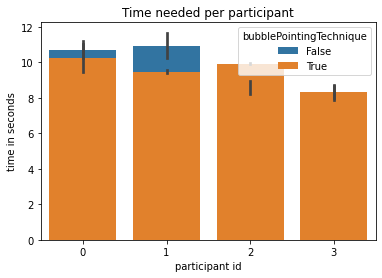

In [106]:
ax = plt.axes()
sns.barplot(data=df_pointing_log, x="participantID", y="timeTillFinishedInS", hue="bubblePointingTechnique", 
            ax = ax, dodge = False)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax.set_xlabel("participant id")
ax.set_ylabel("time in seconds")
ax.set_title("Time needed per participant")

Text(0.5, 1.0, 'Errors made per participant and condition')

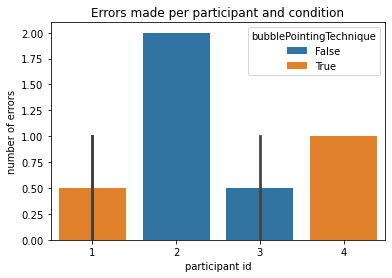

In [107]:
ax = plt.axes()
sns.barplot(data=df_pointing_log, x="participantID", y="missedClickCount", hue="bubblePointingTechnique", 
            ax = ax, dodge = False)
# plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax.set_xlabel("participant id")
ax.set_ylabel("number of errors")
ax.set_title("Errors made per participant and condition")

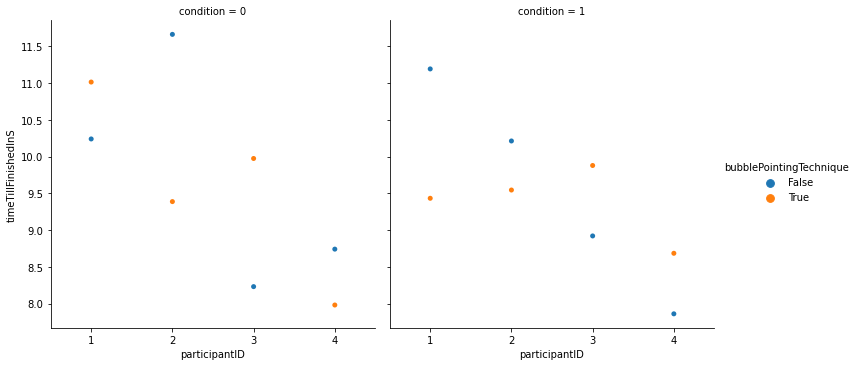

In [109]:
sns.catplot(x="participantID", y="timeTillFinishedInS", hue="bubblePointingTechnique",
            col="condition", kind="swarm", data=df_pointing_log)

### Statistical Analysis:

In [ ]:
# TODO statt conditions hier die beiden pointing techniques überall vergleichen!!

#### Overview of distribution for the needed time

In [112]:
print(f"Minimal time needed for condition 1: {times_condition_1.min()}")
print(f"Maximal time needed for condition 1: {times_condition_1.max()}")
print(f"Minimal time needed for condition 2: {times_condition_2.min()}")
print(f"Maximal time needed for condition 2: {times_condition_2.max()}")

Minimal time needed for condition 1: 7.980283260345459
Maximal time needed for condition 1: 11.664960622787476
Minimal time needed for condition 2: 7.8601837158203125
Maximal time needed for condition 2: 11.194602727890015


In [113]:
print(f"Mean for needed time at condition 1: {times_condition_1.mean()}")
print(f"Standard deviation for needed time at condition 1: {times_condition_1.std()}")
print(f"Mean for needed time at condition 2: {times_condition_2.mean()}")
print(f"Standard deviation for needed time at condition 2: {times_condition_2.std()}")

Mean for needed time at condition 1: 9.654665976762772
Standard deviation for needed time at condition 1: 1.3135495889679538
Mean for needed time at condition 2: 9.466569125652313
Standard deviation for needed time at condition 2: 1.0150694064677546


Text(0.5, 1.0, 'Times needed per condition')

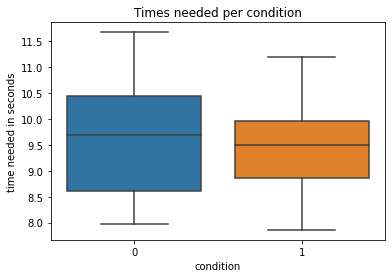

In [114]:
ax = plt.axes()
sns.boxplot(data=df_pointing_log, x="condition", y="timeTillFinishedInS")
ax.set_ylabel("time needed in seconds")
ax.set_title("Times needed per condition")

#### Overview of distribution for the amount of errors

In [115]:
print(f"Minimal amount of errors for condition 1: {errors_condition_1.min()}")
print(f"Maximal amount of errors for condition 1: {errors_condition_1.max()}")
print(f"Minimal amount of errors for condition 2: {errors_condition_2.min()}")
print(f"Maximal amount of errors for condition 2: {errors_condition_2.max()}")

Minimal amount of errors for condition 1: 0
Maximal amount of errors for condition 1: 2
Minimal amount of errors for condition 2: 0
Maximal amount of errors for condition 2: 2


In [116]:
print(f"Mean errors at condition 1: {errors_condition_1.mean()}")
print(f"Standard deviation errors at condition 1: {errors_condition_1.std()}")
print(f"Mean errors at condition 2: {errors_condition_2.mean()}")
print(f"Standard deviation errors at condition 2: {errors_condition_2.std()}")

Mean errors at condition 1: 0.875
Standard deviation errors at condition 1: 0.6408699444616557
Mean errors at condition 2: 0.5
Standard deviation errors at condition 2: 0.7559289460184544


Text(0.5, 1.0, 'Number or errors per condition')

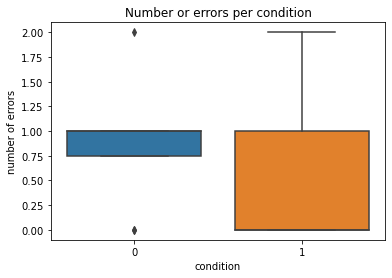

In [117]:
ax = plt.axes()
sns.boxplot(data=df_pointing_log, x="condition", y="missedClickCount")
ax.set_ylabel("number of errors")
ax.set_title("Number or errors per condition")

#### T-Tests for time and errors:

In [118]:
(t_statistic, p_value) = ttest_ind(times_bubble_cursor, times_normal_cursor)
print(f"The calculated t-statistic for the needed time is {t_statistic} and the calculated two-tailed p-value is {p_value}")

The calculated t-statistic for the needed time is -0.24749837040062647 and the calculated two-tailed p-value is 0.8081154223066443


In [120]:
(t_statistic, p_value) = ttest_ind(errors_bubble_cursor, errors_normal_cursor)
print(f"The calculated t-statistic for the amount of errors is {t_statistic} and the calculated two-tailed p-value is {p_value}")

The calculated t-statistic for the amount of errors is -1.9296124624698994 and the calculated two-tailed p-value is 0.074172867682068


In [122]:
# TODO one sided p value?
# (t_statistic, p_value) = ttest_ind(times_bubble_cursor, times_normal_cursor, alternative='greater')
# print(f"The calculated t-statistic for the needed time is {t_statistic} and the calculated two-tailed p-value is {p_value}")

## Discussion:

Our study did not find a significant difference in the time performance between the bubble cursor and the normal cursor (t=-0.247, p=0.808) as well as in the amount of errors between the two techniques t=-1.930, p=0.074). Therefor we cannot reject our null hypothesis. This may be caused by the low number of participants as the four participants were almost identical in speed.